In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time

In [2]:
df=pd.read_csv('final.csv')
df.head()

,Unnamed: 0,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,...,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,0,1,50,0,0.0,1,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0
1,1,1,78,0,1.0,1,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0
2,2,1,31,0,1.0,0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
3,3,1,34,0,1.0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,61.0,0
4,4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0
1,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0


In [4]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [5]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000
mean,0.792208,41.272727,0.097403,0.512987,0.844156,0.344156,0.603896,0.792208,0.844156,0.610390,0.805195,0.668831,0.870130,0.883117,1.413636,101.62987,85.610390,3.835065,61.487013,0.454545
std,0.407051,12.574106,0.297473,0.501462,0.363891,0.476642,0.490682,0.407051,0.363891,0.489253,0.397343,0.472169,0.337257,0.322329,1.194599,47.21664,88.712012,0.621145,17.254813,0.499554
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.00000,14.000000,2.100000,0.000000,0.000000
25%,1.000000,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.800000,78.00000,33.000000,3.500000,57.000000,0.000000
50%,1.000000,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.00000,58.000000,4.000000,61.000000,0.000000
75%,1.000000,50.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,119.75000,99.500000,4.200000,65.500000,1.000000
max,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.00000,648.000000,6.400000,100.000000,1.000000


In [6]:
df['age'].unique()

array([50, 78, 31, 34, 51, 23, 39, 30, 32, 41, 47, 38, 66, 40, 22, 27, 42,
       25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
       45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43],
      dtype=int64)

In [7]:
df['age']=np.where((df['age'] <18) ,'Teenager/Child',
                               np.where((df['age'] >=18) & (df['age'] <=25),'Young',
                                np.where((df['age'] >=25) & (df['age'] <=40),'Adult',
                               'Old')))

In [8]:
df['age'].value_counts()

Old               72
Adult             67
Young             14
Teenager/Child     1
Name: age, dtype: int64

In [9]:
df=pd.get_dummies(df)
df.head()

,class,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager/Child,age_Young
0,1,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,...,0.9,135.0,42.0,3.5,61.0,0,0,1,0,0
1,1,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,...,0.7,96.0,32.0,4.0,61.0,0,0,1,0,0
2,1,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.7,46.0,52.0,4.0,80.0,0,1,0,0,0
3,1,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,85.0,200.0,4.0,61.0,0,1,0,0,0
4,1,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,...,0.9,95.0,28.0,4.0,75.0,0,1,0,0,0


In [10]:
df.columns

Index(['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology', 'age_Adult', 'age_Old', 'age_Teenager/Child',
       'age_Young'],
      dtype='object')

In [11]:
x=df.iloc[:,1:]
y=df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
scale=['bilirubin', 'alk_phosphate', 'sgot', 'albumin']
x_train[scale]=sc.fit_transform(x_train[scale])
x_test[scale]=sc.transform(x_test[scale])

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
params_reg= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'max_iter':[100,150,200,250,300]}

In [17]:
reg_cv=RandomizedSearchCV(reg,params_reg,cv=10,random_state=42)
reg_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 150, 200, 250, 300]},
                   random_state=42)

In [18]:
print(reg_cv.best_score_)
print(reg_cv.best_params_)

0.8685897435897436
{'max_iter': 250, 'C': 0.1}


In [19]:
log_reg=LogisticRegression(max_iter=250,C=0.1)
start_reg=time()
log_reg.fit(x_train,y_train)
end_reg=time()
time_reg=end_reg-start_reg

In [20]:
log_train_time = log_reg.score(x_train,y_train)
log_test_time = log_reg.score(x_test,y_test)
print('Training score: ',log_reg.score(x_train,y_train))
print('Testing score: ',log_reg.score(x_test,y_test))
print('Training time: ',time_reg)

Training score:  0.8861788617886179
Testing score:  0.8387096774193549
Training time:  0.030916929244995117


In [21]:
y_predict_reg=log_reg.predict(x_test)
y_predict_reg

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
accuracy_score(y_test,y_predict_reg)

0.8387096774193549

In [24]:
cm_reg=confusion_matrix(y_test,y_predict_reg)
cm_reg

array([[ 3,  3],
       [ 2, 23]], dtype=int64)

In [25]:
print(classification_report(y_test,y_predict_reg))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        25

    accuracy                           0.84        31
   macro avg       0.74      0.71      0.72        31
weighted avg       0.83      0.84      0.83        31



### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [27]:
params_dt={'criterion':['gini','entropy'],'min_samples_split':np.arange(2,10),'splitter':['best','random'],'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt','log2',None]}

In [28]:
dt_cv=RandomizedSearchCV(dt,params_dt,cv=10,random_state=15)
dt_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'splitter': ['best', 'random']},
                   random_state=15)

In [29]:
print(dt_cv.best_score_)
print(dt_cv.best_params_)

0.860897435897436
{'splitter': 'best', 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy'}


In [30]:
decision_tree=DecisionTreeClassifier(splitter='random',min_samples_split=2,max_features='log2',max_depth=6,criterion='entropy',random_state=10)
start_dt=time()
decision_tree.fit(x_train,y_train)
end_dt=time()
time_dt=end_dt-start_dt

In [31]:
dt_train_time = decision_tree.score(x_train,y_train)
dt_test_time = decision_tree.score(x_test,y_test)
print('Training score: ',decision_tree.score(x_train,y_train))
print('Testing score: ',decision_tree.score(x_test,y_test))
print('Training time: ',time_dt)

Training score:  0.9512195121951219
Testing score:  0.8064516129032258
Training time:  0.0029909610748291016


In [32]:
y_predict_dt=decision_tree.predict(x_test)
y_predict_dt

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [33]:
cm_dt=confusion_matrix(y_test,y_predict_dt)
print(cm_dt)

[[ 2  4]
 [ 2 23]]


In [34]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.85      0.92      0.88        25

    accuracy                           0.81        31
   macro avg       0.68      0.63      0.64        31
weighted avg       0.78      0.81      0.79        31



### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [36]:
params_rf={'n_estimators':[5,10,15,20,50,100,200,300,400,500],'criterion':['entropy','gini'],'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt','log2',None],'bootstrap':[True,False]}

In [37]:
rf_cv=RandomizedSearchCV(rf,params_rf,cv=10,random_state=15)
rf_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': [5, 10, 15, 20, 50, 100,
                                                         200, 300, 400, 500]},
                   random_state=15)

In [38]:
print(rf_cv.best_score_)
print(rf_cv.best_params_)

0.8935897435897434
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}


In [39]:
random_forest=RandomForestClassifier(n_estimators=300,max_features='log2',max_depth=5,criterion='gini',bootstrap=False,random_state=0)
start_rf=time()
random_forest.fit(x_train,y_train)
end_rf=time()
time_rf=end_rf-start_rf

In [40]:
rf_train_time = random_forest.score(x_train,y_train)
rf_test_time = random_forest.score(x_test,y_test)
print('Training score: ',random_forest.score(x_train,y_train))
print('Testing score: ',random_forest.score(x_test,y_test))
print('Training time: ',time_rf)

Training score:  0.967479674796748
Testing score:  0.7419354838709677
Training time:  0.3071780204772949


In [41]:
y_predict_rf=random_forest.predict(x_test)
y_predict_rf

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [42]:
cm_rf=confusion_matrix(y_test,y_predict_rf)
print(cm_rf)

[[ 1  5]
 [ 3 22]]


In [43]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.81      0.88      0.85        25

    accuracy                           0.74        31
   macro avg       0.53      0.52      0.52        31
weighted avg       0.71      0.74      0.72        31



### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [45]:
params_knn={'n_neighbors':[5,6,7,8,9,10]}

In [46]:
knn_cv=RandomizedSearchCV(knn,params_knn,cv=10,random_state=42)
knn_cv.fit(x_train,y_train)
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.8455128205128204
{'n_neighbors': 10}


In [47]:
KNN=KNeighborsClassifier(n_neighbors=10)
start_knn=time()
KNN.fit(x_train,y_train)
end_knn=time()
time_knn=end_knn-start_knn

In [48]:
knn_train_time = KNN.score(x_train,y_train)
knn_test_time = KNN.score(x_test,y_test)
print('Training score: ',KNN.score(x_train,y_train))
print('Testing score: ',KNN.score(x_test,y_test))
print('Training time: ',time_knn)

Training score:  0.8455284552845529
Testing score:  0.8064516129032258
Training time:  0.003975629806518555


In [49]:
y_predict_knn=KNN.predict(x_test)
y_predict_knn

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [50]:
cm_knn=confusion_matrix(y_test,y_predict_knn)
print(cm_knn)

[[ 3  3]
 [ 3 22]]


In [51]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.88      0.88      0.88        25

    accuracy                           0.81        31
   macro avg       0.69      0.69      0.69        31
weighted avg       0.81      0.81      0.81        31



### Support Vector Classifier

In [52]:
from sklearn.svm import SVC
svc=SVC()

In [53]:
params_svm={'kernel':['linear','poly','rbf','sigmoid'],'C':list(np.arange(0.1,0.6)),'gamma':[0.0001,0.001,0.01,0.1,1,10,100,0.02,0.03,0.04,0.05],'degree':[1,2,3,4,5,6]}

In [54]:
svm_cv=RandomizedSearchCV(svc,params_svm,cv=10,random_state=7)
svm_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 0.02, 0.03, 0.04,
                                                  0.05],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=7)

In [55]:
print(svm_cv.best_score_)
print(svm_cv.best_params_)

0.8685897435897436
{'kernel': 'linear', 'gamma': 1, 'degree': 2, 'C': 0.1}


In [56]:
SVM=SVC(kernel='linear',gamma=1,degree=2,C=0.1)
start_svm=time()
SVM.fit(x_train,y_train)
end_svm=time()
time_svm=end_svm-start_svm

In [57]:
SVM_train_time = SVM.score(x_train,y_train)
SVM_test_time = SVM.score(x_test,y_test)
print('Training score: ',SVM.score(x_train,y_train))
print('Testing score: ',SVM.score(x_test,y_test))
print('Training time: ',time_svm)

Training score:  0.9105691056910569
Testing score:  0.8387096774193549
Training time:  0.00398707389831543


In [58]:
y_predict_svm=SVM.predict(x_test)
y_predict_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [59]:
cm_svm=confusion_matrix(y_test,y_predict_svm)
print(cm_svm)

[[ 3  3]
 [ 2 23]]


In [60]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        25

    accuracy                           0.84        31
   macro avg       0.74      0.71      0.72        31
weighted avg       0.83      0.84      0.83        31



### Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [62]:
start_gnb=time()
gnb.fit(x_train,y_train)
end_gnb=time()
time_gnb=end_gnb-start_gnb

In [63]:
gnb_train_time = gnb.score(x_train,y_train)
gnb_test_time = gnb.score(x_test,y_test)
print('Training score: ',gnb.score(x_train,y_train))
print('Testing score: ',gnb.score(x_test,y_test))
print('Training time: ',time_gnb)

Training score:  0.6585365853658537
Testing score:  0.5483870967741935
Training time:  0.0029926300048828125


In [64]:
y_predict_gnb=gnb.predict(x_test)
y_predict_gnb

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [65]:
cm_gnb=confusion_matrix(y_test,y_predict_gnb)
print(cm_gnb)

[[ 4  2]
 [12 13]]


In [66]:
print(classification_report(y_test,y_predict_gnb))

              precision    recall  f1-score   support

           0       0.25      0.67      0.36         6
           1       0.87      0.52      0.65        25

    accuracy                           0.55        31
   macro avg       0.56      0.59      0.51        31
weighted avg       0.75      0.55      0.59        31



## Compairing Training Accuracy of Different Models

Text(0.5, 1.0, 'Model Training Accuracy')

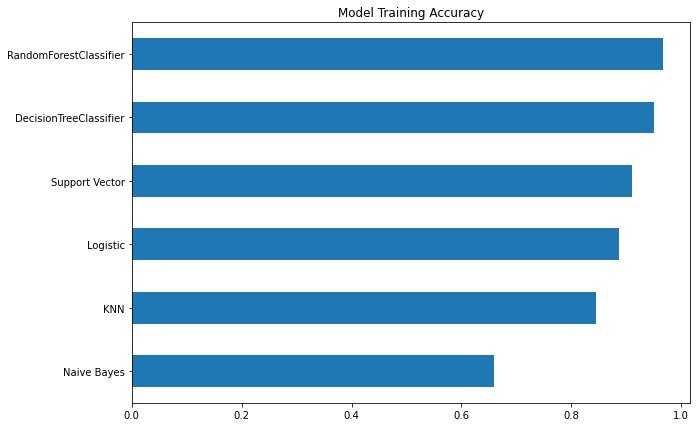

In [67]:
model_training_time = pd.Series(data=[knn_train_time,log_train_time,dt_train_time,rf_train_time,SVM_train_time,gnb_train_time],
                          index=['KNN','Logistic','DecisionTreeClassifier','RandomForestClassifier','Support Vector','Naive Bayes'])
fig= plt.figure(figsize=(10,7))
model_training_time.sort_values().plot.barh()
plt.title('Model Training Accuracy')

## Compairing Testing Accuracy of Different Models


Text(0.5, 1.0, 'Model Testing Accuracy')

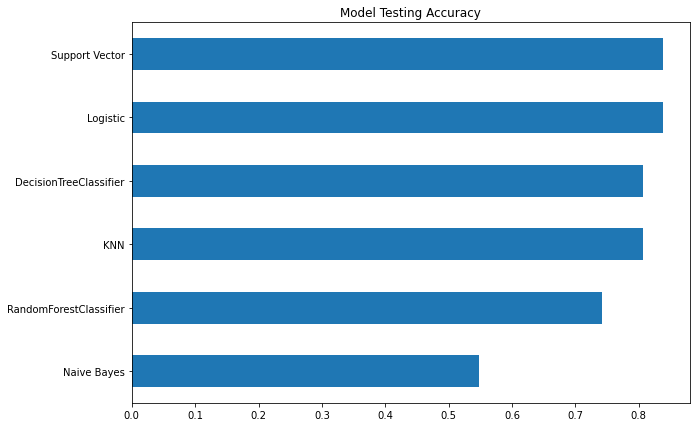

In [68]:
model_testing_time = pd.Series(data=[knn_test_time,log_test_time,dt_test_time,rf_test_time,SVM_test_time,gnb_test_time],
                          index=['KNN','Logistic','DecisionTreeClassifier','RandomForestClassifier','Support Vector','Naive Bayes'])
fig= plt.figure(figsize=(10,7))
model_testing_time.sort_values().plot.barh()
plt.title('Model Testing Accuracy')

## Comparing Confusion Matrix of different Classifiers

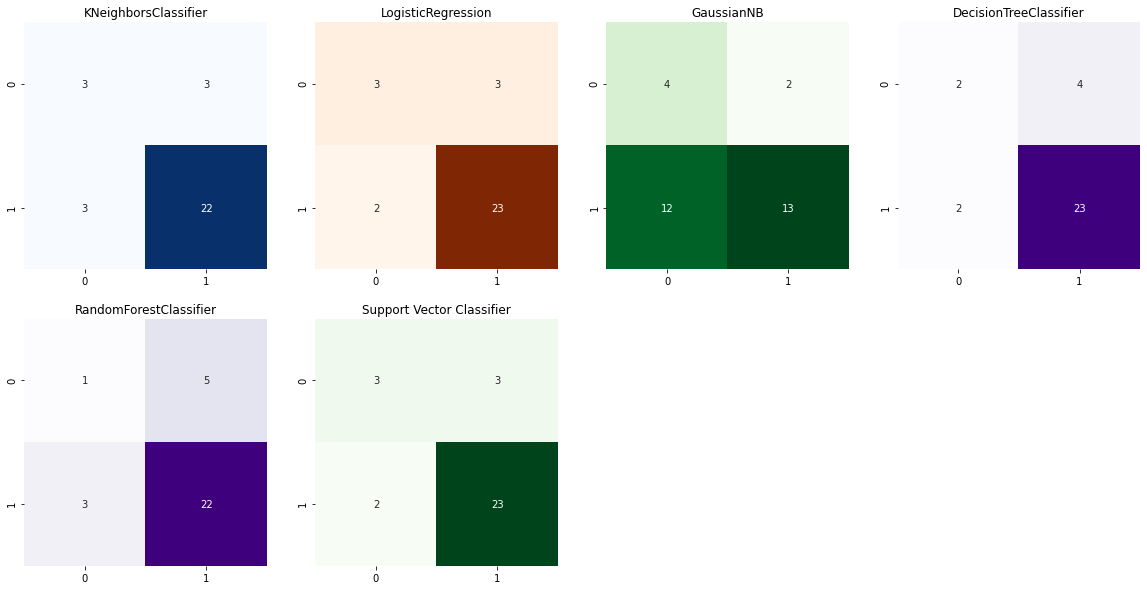

In [69]:
knn_con = confusion_matrix(y_test, y_predict_knn)
log_con = confusion_matrix(y_test, y_predict_reg)
nb_con = confusion_matrix(y_test, y_predict_gnb)
dtc_con = confusion_matrix(y_test, y_predict_dt)
rf_con = confusion_matrix(y_test, y_predict_rf)
svm_con = confusion_matrix(y_test, y_predict_svm)


plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("KNeighborsClassifier")
sns.heatmap(knn_con,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("LogisticRegression")
sns.heatmap(log_con,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,4,3)
plt.title("GaussianNB")
sns.heatmap(nb_con,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("DecisionTreeClassifier")
sns.heatmap(dtc_con,annot=True,cmap="Purples",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("RandomForestClassifier")
sns.heatmap(rf_con,annot=True,cmap="Purples",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("Support Vector Classifier")
sns.heatmap(svm_con,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.show()

### Comparing Training times of different Classifiers

In [70]:
training_times=[time_dt,time_rf,time_knn,time_gnb,time_svm,time_reg]
algo=['Decision Tree Classifier','Random Forest Classifier','KNN','Gaussian Naive Bayes','Support Vector Classifier','Logistic Regression']


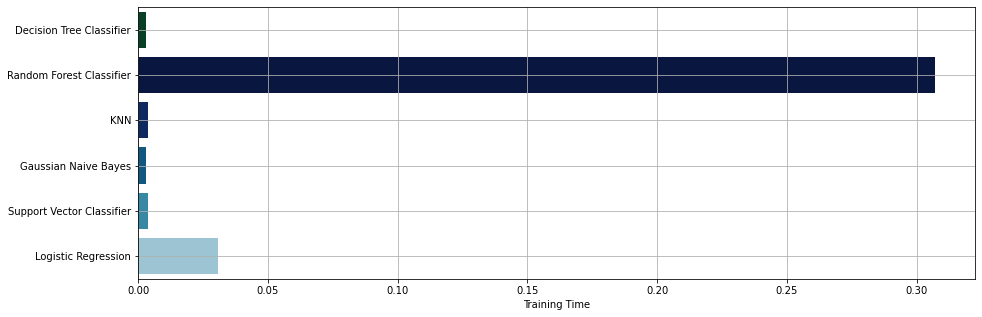

In [71]:
plt.figure(figsize=(15,5))
sns.barplot(y=algo,x=training_times,palette='ocean')
plt.xlabel('Training Time')
plt.grid()
plt.show()

### Bagging Classifier

In [72]:
from sklearn.ensemble import BaggingClassifier

In [73]:
df_bagging=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_bag=[decision_tree,random_forest,log_reg,KNN,SVM,gnb]
algo_name=['Decision Tree','Random Forest','Logistic Regression','KNN','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_bag)):
    case_of=''
    difference=0
    bag=BaggingClassifier(to_bag[i],bootstrap=True,random_state=0)
    start=time()
    bag.fit(x_train,y_train)
    end=time()
    time_taken=end-start
    if bag.score(x_train,y_train)>bag.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=bag.score(x_train,y_train)-bag.score(x_test,y_test)
    df_bagging.loc[i]=[algo_name[i],bag.score(x_train,y_train),bag.score(x_test,y_test),time_taken,case_of,difference]
df_bagging

,Base Estimator,Training Score,Testing Score,Time Taken,Case Of,Diff(Training-Testing)
0,Decision Tree,0.926829,0.838710,0.029882,Overfitting,0.088120
1,Random Forest,0.959350,0.741935,3.873640,Overfitting,0.217414
2,Logistic Regression,0.861789,0.838710,0.269279,Overfitting,0.023079
3,KNN,0.821138,0.806452,0.034906,Overfitting,0.014687
4,Support Vector Classifier,0.894309,0.774194,0.023998,Overfitting,0.120115
5,Gaussian Naive Bayes Classifier,0.674797,0.580645,0.017951,Overfitting,0.094152


### Adaboost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
df_adaboost=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_bag=[decision_tree,random_forest,log_reg,KNN,SVM,gnb]
to_boost=[decision_tree,random_forest,log_reg,SVM,gnb]
algo_name=['Decision Tree','Random Forest','Logistic Regression','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_boost)):
    boost=AdaBoostClassifier(to_boost[i],n_estimators=100,algorithm='SAMME',random_state=7)
    start=time()
    boost.fit(x_train,y_train)
    end=time()
    time_taken=end-start
    if boost.score(x_train,y_train)>boost.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=boost.score(x_train,y_train)-boost.score(x_test,y_test)
    df_adaboost.loc[i]=[algo_name[i],boost.score(x_train,y_train),boost.score(x_test,y_test),time_taken,case_of,difference]
df_adaboost

,Base Estimator,Training Score,Testing Score,Time Taken,Case Of,Diff(Training-Testing)
0,Decision Tree,1.000000,0.838710,0.145613,Overfitting,0.161290
1,Random Forest,1.000000,0.774194,1.156888,Overfitting,0.225806
2,Logistic Regression,0.869919,0.774194,0.109715,Overfitting,0.095725
3,Support Vector Classifier,0.796748,0.774194,0.046832,Overfitting,0.022554
4,Gaussian Naive Bayes Classifier,0.658537,0.548387,0.003990,Overfitting,0.110149


### Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
params_gb={'learning_rate':[0.1,0.2,0.3,0.4,0.5,1,2,0.01,0.02,0.05],'n_estimators':[100,150,200,300],
           'max_depth':[2,3,4,5,6],'min_samples_split':list(np.arange(1,10)),'criterion':['friedman_mse','mse','mae']}
GB_cv=RandomizedSearchCV(gb,params_gb,cv=10,random_state=7)
GB_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 1, 2, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=7)

In [77]:
print('Best score: ',GB_cv.best_score_)
print('Best parameters: ',GB_cv.best_params_)

Best score:  0.9102564102564102
Best parameters:  {'n_estimators': 150, 'min_samples_split': 9, 'max_depth': 6, 'learning_rate': 0.3, 'criterion': 'friedman_mse'}


In [78]:
GB=GradientBoostingClassifier(n_estimators=150,max_depth=2,learning_rate=0.5,min_samples_split=8,criterion='mse')

In [79]:
GB.fit(x_train,y_train)
GB.score(x_test,y_test)

0.8064516129032258

In [80]:
df_gboost=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_boost=[decision_tree,random_forest,log_reg,SVM,gnb]
algo_name=['Decision Tree','Random Forest','Logistic Regression','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_boost)):
    gboost=GradientBoostingClassifier(n_estimators=200,max_depth=2,learning_rate=0.2,min_samples_split=8,criterion='mse')
    start=time()
    gboost.fit(x_train,y_train)
    end=time()
    time_taken=end-start
    if gboost.score(x_train,y_train)>boost.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=boost.score(x_train,y_train)-boost.score(x_test,y_test)
    df_gboost.loc[i]=[algo_name[i],gboost.score(x_train,y_train),gboost.score(x_test,y_test),time_taken,case_of,difference]
df_gboost

,Base Estimator,Training Score,Testing Score,Time Taken,Case Of,Diff(Training-Testing)
0,Decision Tree,1.0,0.806452,0.190489,Overfitting,0.110149
1,Random Forest,1.0,0.806452,0.154648,Overfitting,0.110149
2,Logistic Regression,1.0,0.806452,0.095808,Overfitting,0.110149
3,Support Vector Classifier,1.0,0.806452,0.097677,Overfitting,0.110149
4,Gaussian Naive Bayes Classifier,1.0,0.806452,0.183505,Overfitting,0.110149


### USING SMOTE

In [81]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=0)
x_train_res,y_train_res=sm.fit_sample(x_train,y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print(x_train_res.shape)
print(y_train_res.shape)

### Logistic Regression

In [ ]:
params_reg= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'max_iter':[100,150,200,250,300]}

In [ ]:
reg_cv1=RandomizedSearchCV(reg,params_reg,cv=10,random_state=0)
reg_cv1.fit(x_train_res,y_train_res)
print(reg_cv1.best_score_)
print(reg_cv1.best_params_)

In [ ]:
LR=LogisticRegression(max_iter=100,C=10,random_state=0)
LR.fit(x_train_res,y_train_res)
print('Training score: ',LR.score(x_train_res,y_train_res))
print('Testing score: ',LR.score(x_test,y_test))

In [ ]:
y_predict_LR=LR.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_LR))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_LR))

### Decision Tree Classifier

In [ ]:
params_dt={'criterion':['gini','entropy'],'min_samples_split':np.arange(2,10),'splitter':['best','random'],'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt','log2',None]}

In [ ]:
dt_cv1=RandomizedSearchCV(dt,params_dt,cv=15,random_state=42)
dt_cv1.fit(x_train_res,y_train_res)
print(dt_cv1.best_score_)
print(dt_cv1.best_params_)

In [ ]:
DT=DecisionTreeClassifier(splitter='best',min_samples_split=7,max_features=None,max_depth=5,criterion='entropy')
DT.fit(x_train_res,y_train_res)
print('Training score: ',DT.score(x_train_res,y_train_res))
print('Testing score: ',DT.score(x_test,y_test))

In [ ]:
y_predict_DT=DT.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_DT))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_DT))

### Random Forest Classifier

In [ ]:
params_rf={'n_estimators':[5,10,15,20,50,100,200,300,400,500],'criterion':['entropy','gini'],'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt','log2',None],'bootstrap':[True,False]}

In [ ]:
rf_cv1=RandomizedSearchCV(rf,params_rf,cv=10,random_state=0)
rf_cv1.fit(x_train_res,y_train_res)
print(rf_cv1.best_score_)
print(rf_cv1.best_params_)

In [ ]:
RF=RandomForestClassifier(n_estimators=500,max_features='log2',max_depth=6,criterion='gini',bootstrap=True)
RF.fit(x_train_res,y_train_res)
print('Training score: ',RF.score(x_train_res,y_train_res))
print('Testing score: ',RF.score(x_test,y_test))

In [ ]:
y_predict_RF=RF.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_RF))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_RF))

### KNN

In [ ]:
params_knn={'n_neighbors':[5,6,7,8,9,10]}

In [ ]:
knn_cv1=RandomizedSearchCV(knn,params_knn,cv=10,random_state=0)
knn_cv1.fit(x_train_res,y_train_res)
print(knn_cv1.best_score_)
print(knn_cv1.best_params_)

In [ ]:
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train_res,y_train_res)
print('Training score: ',RF.score(x_train_res,y_train_res))
print('Testing score: ',RF.score(x_test,y_test))

In [ ]:
y_predict_KNN=Knn.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_KNN))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_KNN))

### Support Vector Classifier

In [ ]:
params_svm={'kernel':['linear','poly','rbf','sigmoid'],'C':list(np.arange(0.1,0.6)),'gamma':[0.0001,0.001,0.01,0.1,1,10,100,0.02,0.03,0.04,0.05],'degree':[1,2,3,4,5,6]}

In [ ]:
svm_cv1=RandomizedSearchCV(svc,params_svm,cv=10,random_state=7)
svm_cv1.fit(x_train_res,y_train_res)
print(svm_cv1.best_score_)
print(svm_cv1.best_params_)

In [ ]:
SVM1=SVC(kernel='poly',gamma=10,degree=3,C=0.1)
SVM1.fit(x_train_res,y_train_res)
print('Training score: ',SVM1.score(x_train_res,y_train_res))
print('Testing score: ',SVM1.score(x_test,y_test))

In [ ]:
y_predict_SVM1=SVM1.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_SVM1))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_SVM1))

### Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train_res,y_train_res)
print('Training score: ',GNB.score(x_train_res,y_train_res))
print('Testing score: ',GNB.score(x_test,y_test))

In [ ]:
y_predict_GNB=GNB.predict(x_test)
print('CONFUSION MATRIX:  ')
print(confusion_matrix(y_test,y_predict_GNB))
print()
print('CLASSIFICATION REPORT: ')
print()      
print(classification_report(y_test,y_predict_GNB))

### Bagging Classifier 

In [ ]:
df_bagging_sm=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_bag=[DT,RF,LR,Knn,SVM1,GNB]
algo_name=['Decision Tree','Random Forest','Logistic Regression','KNN','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_bag)):
    case_of=''
    difference=0
    BAG=BaggingClassifier(to_bag[i],bootstrap=True,random_state=0)
    start=time()
    BAG.fit(x_train_res,y_train_res)
    end=time()
    time_taken=end-start
    if BAG.score(x_train_res,y_train_res)>BAG.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=BAG.score(x_train_res,y_train_res)-BAG.score(x_test,y_test)
    df_bagging_sm.loc[i]=[algo_name[i],BAG.score(x_train_res,y_train_res),BAG.score(x_test,y_test),time_taken,case_of,difference]
df_bagging_sm

### Adaboost Classifier

In [ ]:
df_adaboost_sm=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_boost=[DT,RF,LR,SVM1,GNB]
algo_name=['Decision Tree','Random Forest','Logistic Regression','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_boost)):
    boost=AdaBoostClassifier(to_boost[i],n_estimators=100,algorithm='SAMME',random_state=0)
    start=time()
    boost.fit(x_train_res,y_train_res)
    end=time()
    time_taken=end-start
    if boost.score(x_train_res,y_train_res)>boost.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=boost.score(x_train_res,y_train_res)-boost.score(x_test,y_test)
    df_adaboost_sm.loc[i]=[algo_name[i],boost.score(x_train_res,y_train_res),boost.score(x_test,y_test),time_taken,case_of,difference]
df_adaboost_sm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
params_gb={'learning_rate':[0.1,0.2,0.3,0.4,0.5,1,2,0.01,0.02,0.05],'n_estimators':[100,150,200,300],
           'max_depth':[2,3,4,5,6],'min_samples_split':list(np.arange(1,10)),'criterion':['friedman_mse','mse','mae']}
GB_cv1=RandomizedSearchCV(gb,params_gb,cv=10,random_state=7)
GB_cv1.fit(x_train_res,y_train_res)

In [ ]:
print('Best score: ',GB_cv.best_score_)
print('Best parameters: ',GB_cv.best_params_)

In [ ]:
GB_sm=GradientBoostingClassifier(n_estimators=300,min_samples_split=7,max_depth=3,learning_rate=0.5,criterion='mse')
GB_sm.fit(x_train_res,y_train_res)
print('Training score: ',GB_sm.score(x_train_res,y_train_res))
print('Testing score: ',GB_sm.score(x_test,y_test))

In [ ]:
df_gboost_sm=DataFrame(columns=['Base Estimator','Training Score','Testing Score','Time Taken','Case Of','Diff(Training-Testing)'])
to_boost=[DT,RF,LR,SVM1,GNB]
algo_name=['Decision Tree','Random Forest','Logistic Regression','Support Vector Classifier','Gaussian Naive Bayes Classifier']
for i in range(len(to_boost)):
    gboost=GradientBoostingClassifier()
    start=time()
    gboost.fit(x_train_res,y_train_res)
    end=time()
    time_taken=end-start
    if gboost.score(x_train_res,y_train_res)>gboost.score(x_test,y_test):
        case_of='Overfitting'
    else:
        case_of='Underfitting'
    difference=gboost.score(x_train_res,y_train_res)-gboost.score(x_test,y_test)
    df_gboost_sm.loc[i]=[algo_name[i],gboost.score(x_train_res,y_train_res),gboost.score(x_test,y_test),time_taken,case_of,difference]
df_gboost_sm

In [82]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from keras.regularizers import l2, l1

In [83]:
model=Sequential()
model.add(Dense(units=18, input_dim=x.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(units=9,activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                414       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.0001, momentum=0.9), 
              metrics=['accuracy'])

In [86]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - loss: 3.5272 - accuracy: 0.7886 - val_loss: 3.3014 - val_accuracy: 0.8065
Epoch 2/100
4/4 - 0s - loss: 3.1929 - accuracy: 0.7886 - val_loss: 2.9220 - val_accuracy: 0.8065
Epoch 3/100
4/4 - 0s - loss: 2.7644 - accuracy: 0.7886 - val_loss: 2.3806 - val_accuracy: 0.8065
Epoch 4/100
4/4 - 0s - loss: 2.2103 - accuracy: 0.7886 - val_loss: 1.7987 - val_accuracy: 0.8065
Epoch 5/100
4/4 - 0s - loss: 1.5697 - accuracy: 0.7886 - val_loss: 1.2920 - val_accuracy: 0.8065
Epoch 6/100
4/4 - 0s - loss: 1.2516 - accuracy: 0.7724 - val_loss: 1.4368 - val_accuracy: 0.4516
Epoch 7/100
4/4 - 0s - loss: 1.5018 - accuracy: 0.3821 - val_loss: 1.3438 - val_accuracy: 0.6129
Epoch 8/100
4/4 - 0s - loss: 1.2521 - accuracy: 0.7805 - val_loss: 1.2437 - val_accuracy: 0.8065
Epoch 9/100
4/4 - 0s - loss: 1.2960 - accuracy: 0.7886 - val_loss: 1.3336 - val_accuracy: 0.8065
Epoch 10/100
4/4 - 0s - loss: 1.3189 - accuracy: 0.7886 - val_loss: 1.2902 - val_accuracy: 0.8065
Epoch 11/100
4/4 - 0s - loss:

Epoch 85/100
4/4 - 0s - loss: 1.1525 - accuracy: 0.7967 - val_loss: 1.1822 - val_accuracy: 0.8387
Epoch 86/100
4/4 - 0s - loss: 1.1543 - accuracy: 0.7967 - val_loss: 1.1826 - val_accuracy: 0.8387
Epoch 87/100
4/4 - 0s - loss: 1.1551 - accuracy: 0.7967 - val_loss: 1.1825 - val_accuracy: 0.8387
Epoch 88/100
4/4 - 0s - loss: 1.1518 - accuracy: 0.7967 - val_loss: 1.1812 - val_accuracy: 0.8387
Epoch 89/100
4/4 - 0s - loss: 1.1537 - accuracy: 0.7967 - val_loss: 1.1816 - val_accuracy: 0.8387
Epoch 90/100
4/4 - 0s - loss: 1.1510 - accuracy: 0.7967 - val_loss: 1.1804 - val_accuracy: 0.8387
Epoch 91/100
4/4 - 0s - loss: 1.1506 - accuracy: 0.7967 - val_loss: 1.1814 - val_accuracy: 0.8387
Epoch 92/100
4/4 - 0s - loss: 1.1496 - accuracy: 0.7967 - val_loss: 1.1804 - val_accuracy: 0.8387
Epoch 93/100
4/4 - 0s - loss: 1.1502 - accuracy: 0.7967 - val_loss: 1.1790 - val_accuracy: 0.8387
Epoch 94/100
4/4 - 0s - loss: 1.1481 - accuracy: 0.7967 - val_loss: 1.1786 - val_accuracy: 0.8387
Epoch 95/100
4/4 - 0

In [87]:
loss=DataFrame(history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,3.527241,0.788618,3.301371,0.806452
1,3.192881,0.788618,2.921988,0.806452
2,2.764362,0.788618,2.380553,0.806452
3,2.210268,0.788618,1.798735,0.806452
4,1.569684,0.788618,1.292000,0.806452


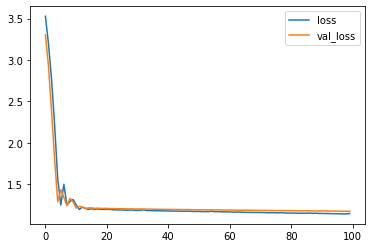

In [88]:
loss[['loss', 'val_loss']].plot()
plt.show()

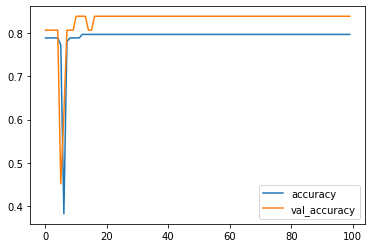

In [89]:
loss[['accuracy', 'val_accuracy']].plot()
plt.show()

In [90]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Training accuracy: ', train_acc)
print('Testng accuracy: ', test_acc)

Training accuracy:  0.7967479825019836
Testng accuracy:  0.8387096524238586
